# Notebook for accessing data via SentinelAPI

# 1. Load modules

In [2]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, DrawControl, Polygon
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from termcolor import colored
from datetime import date
import matplotlib
import geopandas
import shapely

# 2. Define study area

In [4]:
#define basemap with drawing options - sentinel -1

m = Map(center = [41.9,12.4], zoom =10)
draw_control = DrawControl(polyline={}, circlemarker = {}, polygon={})
draw_control.rectangle = {"shapeOptions":
                         {"fillColor": "#66C7F4",
                          "color": "#0027D4",
                          "fillOpacity": 0.4
                          }
                         }

m.add_control(draw_control)
m
#draw polygon below

Map(center=[41.9, 12.4], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [10]:
#coordinates from AOI

print(colored('GeoJSON information of AOI:\n', 'blue'),draw_control.last_draw)

footprint = geojson_to_wkt(draw_control.last_draw)
print(colored('\nGeoJSON geometry converted to well known text (WKT) format:\n','blue'), footprint)

GeoJSON information of AOI:
 {'type': 'Feature', 'properties': {'style': {'stroke': True, 'color': '#0027D4', 'weight': 4, 'opacity': 0.5, 'fill': True, 'fillColor': '#66C7F4', 'fillOpacity': 0.4, 'clickable': True}}, 'geometry': {'type': 'Polygon', 'coordinates': [[[12.3261, 41.756049], [12.3261, 41.999407], [12.690097, 41.999407], [12.690097, 41.756049], [12.3261, 41.756049]]]}}

GeoJSON geometry converted to well known text (WKT) format:
 POLYGON((12.3261 41.7560,12.3261 41.9994,12.6901 41.9994,12.6901 41.7560,12.3261 41.7560))


# 3. API interaction

With the AOI defined as WKT, we can use it in a query via API

In [14]:
#set scihub details
api = SentinelAPI('username','password', 'https://scihub.copernicus.eu/dhus')

#set params
kw = {
      'date': ('20200301','20200310'),       #YYYY-MM-DD
      'platformname': 'Sentinel-2',          #or Sentinel-1, Sentinel-3
      'producttype':'S2MSI1C',                #on S2MSI2A, SLC - GRD, OL_2_LFR__, SR_2_LAN__, etc
       'cloudcoverpercentage': ('0','50'), #[0 to 50]
      #'tileID': '32TQM'
      'area_relation': 'Intersects'  #or Contains, IsWithin
}

#send query
products = api.query(footprint, **kw)

#save output to df
products_df = api.to_dataframe(products)
products_df

,title,link,link_alternative,link_icon,summary,datatakesensingstart,beginposition,endposition,ingestiondate,orbitnumber,...,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,level1cpdiidentifier,uuid
6c7c7d64-e05a-4a59-b039-ccfad9350b2d,S2A_MSIL1C_20200306T100021_N0209_R122_T32TQM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-03-06T10:00:21.024Z, Instrument: MS...",2020-03-06 10:00:21.024,2020-03-06 10:00:21.024,2020-03-06 10:00:21.024,2020-03-06 14:15:25.729,24572,...,739.53 MB,GS2A_20200306T100021_024572_N02.09,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_MSIL1C_20200306T100021_N0209_R122_T32TQM_2...,S2A_OPER_MSI_L1C_TL_MTI__20200306T103940_A0245...,6c7c7d64-e05a-4a59-b039-ccfad9350b2d
cac194a2-ed4c-416a-8db9-4422f51534fc,S2A_MSIL1C_20200306T100021_N0209_R122_T33TTG_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-03-06T10:00:21.024Z, Instrument: MS...",2020-03-06 10:00:21.024,2020-03-06 10:00:21.024,2020-03-06 10:00:21.024,2020-03-06 14:15:24.279,24572,...,734.50 MB,GS2A_20200306T100021_024572_N02.09,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_MSIL1C_20200306T100021_N0209_R122_T33TTG_2...,S2A_OPER_MSI_L1C_TL_MTI__20200306T103940_A0245...,cac194a2-ed4c-416a-8db9-4422f51534fc
3697a3bf-8e1c-41de-83d8-b43036463043,S2B_MSIL1C_20200304T101019_N0209_R022_T33TTG_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-03-04T10:10:19.025Z, Instrument: MS...",2020-03-04 10:10:19.025,2020-03-04 10:10:19.025,2020-03-04 10:10:19.025,2020-03-04 19:12:23.735,15635,...,464.37 MB,GS2B_20200304T101019_015635_N02.09,S2MSI1C,2017-013A,DESCENDING,Sentinel-2B,Level-1C,S2B_MSIL1C_20200304T101019_N0209_R022_T33TTG_2...,S2B_OPER_MSI_L1C_TL_EPAE_20200304T131647_A0156...,3697a3bf-8e1c-41de-83d8-b43036463043
0ced0359-0f91-42c6-a4b3-10d3472e6c25,S2B_MSIL1C_20200304T101019_N0209_R022_T32TQM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-03-04T10:10:19.025Z, Instrument: MS...",2020-03-04 10:10:19.025,2020-03-04 10:10:19.025,2020-03-04 10:10:19.025,2020-03-04 19:10:28.327,15635,...,450.06 MB,GS2B_20200304T101019_015635_N02.09,S2MSI1C,2017-013A,DESCENDING,Sentinel-2B,Level-1C,S2B_MSIL1C_20200304T101019_N0209_R022_T32TQM_2...,S2B_OPER_MSI_L1C_TL_EPAE_20200304T131647_A0156...,0ced0359-0f91-42c6-a4b3-10d3472e6c25


In [26]:
import re

def get_tile(title):
    return re.findall('^(?:[^_]+_){5}([^_ ]+)', title)

'''
what the regex means:
^         # beginning of string
(?:       # non-capturing group
    [^_]+ # not _, at least once
    _     # _
){5}      # repeat the group 5 times (we are interested in characters after the fifth underscore)
([^_ ]+)  # capture characters not _ or spaces to group 1
'''

#test
print(get_tile('S2A_MSIL1C_20200306T100021_N0209_R122_T32TQM_2')) #should return T32TQM_2

#print(products_df['title'].split[4])
products_df['tile'] = products_df['title'].apply(get_tile2)

products_df

['T32TQM']


,title,link,link_alternative,link_icon,summary,datatakesensingstart,beginposition,endposition,ingestiondate,orbitnumber,...,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,level1cpdiidentifier,uuid,tile
6c7c7d64-e05a-4a59-b039-ccfad9350b2d,S2A_MSIL1C_20200306T100021_N0209_R122_T32TQM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-03-06T10:00:21.024Z, Instrument: MS...",2020-03-06 10:00:21.024,2020-03-06 10:00:21.024,2020-03-06 10:00:21.024,2020-03-06 14:15:25.729,24572,...,GS2A_20200306T100021_024572_N02.09,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_MSIL1C_20200306T100021_N0209_R122_T32TQM_2...,S2A_OPER_MSI_L1C_TL_MTI__20200306T103940_A0245...,6c7c7d64-e05a-4a59-b039-ccfad9350b2d,[T32TQM]
cac194a2-ed4c-416a-8db9-4422f51534fc,S2A_MSIL1C_20200306T100021_N0209_R122_T33TTG_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-03-06T10:00:21.024Z, Instrument: MS...",2020-03-06 10:00:21.024,2020-03-06 10:00:21.024,2020-03-06 10:00:21.024,2020-03-06 14:15:24.279,24572,...,GS2A_20200306T100021_024572_N02.09,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_MSIL1C_20200306T100021_N0209_R122_T33TTG_2...,S2A_OPER_MSI_L1C_TL_MTI__20200306T103940_A0245...,cac194a2-ed4c-416a-8db9-4422f51534fc,[T33TTG]
3697a3bf-8e1c-41de-83d8-b43036463043,S2B_MSIL1C_20200304T101019_N0209_R022_T33TTG_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-03-04T10:10:19.025Z, Instrument: MS...",2020-03-04 10:10:19.025,2020-03-04 10:10:19.025,2020-03-04 10:10:19.025,2020-03-04 19:12:23.735,15635,...,GS2B_20200304T101019_015635_N02.09,S2MSI1C,2017-013A,DESCENDING,Sentinel-2B,Level-1C,S2B_MSIL1C_20200304T101019_N0209_R022_T33TTG_2...,S2B_OPER_MSI_L1C_TL_EPAE_20200304T131647_A0156...,3697a3bf-8e1c-41de-83d8-b43036463043,[T33TTG]
0ced0359-0f91-42c6-a4b3-10d3472e6c25,S2B_MSIL1C_20200304T101019_N0209_R022_T32TQM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-03-04T10:10:19.025Z, Instrument: MS...",2020-03-04 10:10:19.025,2020-03-04 10:10:19.025,2020-03-04 10:10:19.025,2020-03-04 19:10:28.327,15635,...,GS2B_20200304T101019_015635_N02.09,S2MSI1C,2017-013A,DESCENDING,Sentinel-2B,Level-1C,S2B_MSIL1C_20200304T101019_N0209_R022_T32TQM_2...,S2B_OPER_MSI_L1C_TL_EPAE_20200304T131647_A0156...,0ced0359-0f91-42c6-a4b3-10d3472e6c25,[T32TQM]


/home/polecat/anaconda3/envs/py3_geo/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


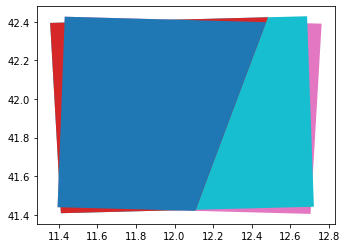

In [17]:
#plot the footprints of the 
products_gdf = api.to_geodataframe(products)
products_gdf.plot(column='uuid');

# Download data 

with the successful API response, can download process by requesting one in specific or all

In [ ]:
download_folder = "/Downloads/SentinelData"

api.download_all(products, directory_path = donwload_folder, checksum=True)
api.download(products_df['uuid'][0], directory_path = download_folder) #or use the index of the df to download